In [13]:
# Generating Perlin Noise TR
from perlin_noise import PerlinNoise
import numpy as np

In [14]:
perlin = PerlinNoise(octaves=9, seed=8)
#  create TR perlin noise variation 
no_TRs = 1000
TR_var = np.array([perlin(i/no_TRs) for i in range(no_TRs)])
# scale TR to our range
min_TR = 11.5
max_TR = 14.5
TR_var = (TR_var-min(TR_var))/(max(TR_var)-min(TR_var))*(max_TR-min_TR)+min_TR


Text(0, 0.5, 'TR (s)')

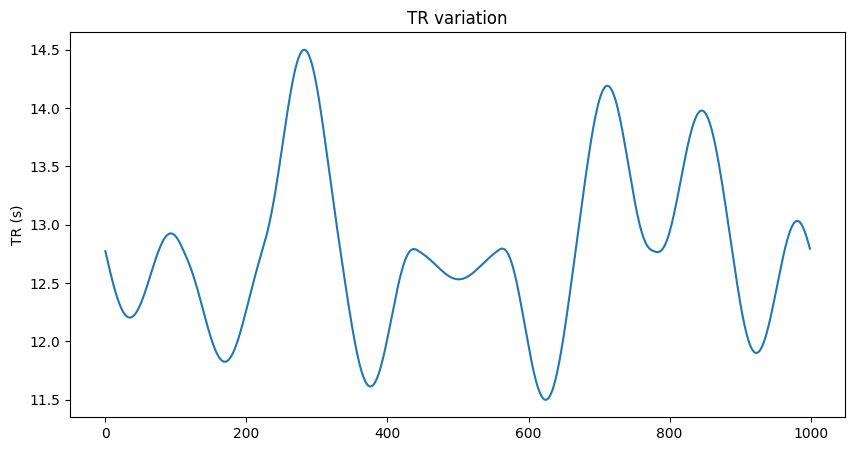

In [15]:
import matplotlib.pyplot as plt
plt.plot(TR_var)
plt.title('TR variation')
plt.ylabel('TR (s)')

Extrapolating the TR variation from the original paper by using https://apps.automeris.io/wpd/

(0.0, 1000.0)

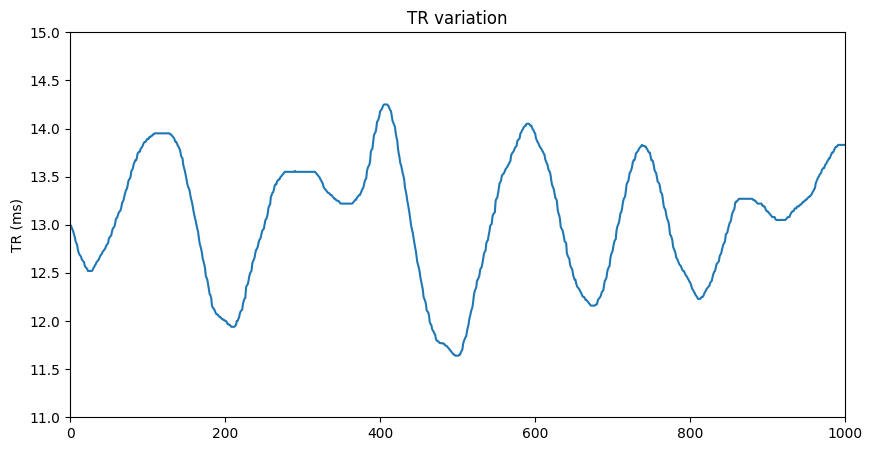

In [16]:
plt.rcParams['figure.figsize'] = [10, 5]

FISP_TR_raw = np.genfromtxt('./functions/holdArrays/FISP_TR_raw.csv', delimiter=',')
# clean up data
# sort based on x-data to ensure data is in correct order
FISP_TR = FISP_TR_raw[FISP_TR_raw[:, 0].argsort()]
# remove first column
FISP_TR = FISP_TR[:,1]
plt.plot(FISP_TR)
plt.title('TR variation')
plt.ylabel('TR (ms)')
plt.ylim([11,15])
plt.xlim([0,1000])


(0.0, 1000.0)

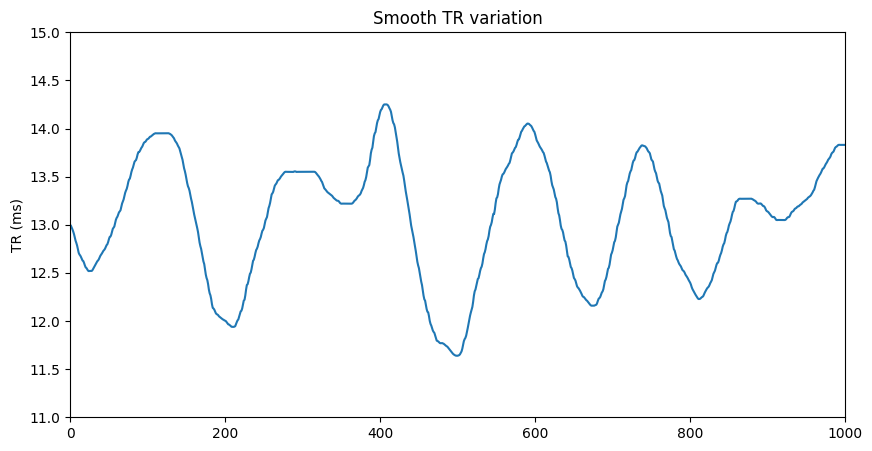

In [17]:
from scipy.signal import savgol_filter
smoothed_TR = savgol_filter(FISP_TR, window_length=5, polyorder=3)
plt.plot(smoothed_TR)
plt.title('Smooth TR variation')
plt.ylabel('TR (ms)')
plt.ylim([11,15])
plt.xlim([0,1000])

In [21]:
from collections import Counter
Counter(smoothed_TR)

Counter({13.55: 31,
         13.95: 17,
         13.22: 14,
         13.27: 14,
         13.05: 9,
         13.830000000000002: 7,
         13.221714285714286: 4,
         13.219142857142858: 4,
         13.25: 3,
         13.22914285714286: 3,
         13.049142857142858: 3,
         12.327428571428571: 3,
         13.270857142857142: 3,
         12.709142857142858: 2,
         12.520000000000001: 2,
         12.69: 2,
         12.751714285714286: 2,
         13.243428571428574: 2,
         13.263428571428573: 2,
         13.332571428571429: 2,
         13.444: 2,
         13.67257142857143: 2,
         13.69685714285714: 2,
         13.730571428571428: 2,
         13.800857142857144: 2,
         13.811714285714288: 2,
         13.937428571428573: 2,
         13.943428571428573: 2,
         13.94742857142857: 2,
         13.950857142857142: 2,
         13.807428571428574: 2,
         13.108285714285714: 2,
         13.0: 2,
         12.591714285714286: 2,
         11.941714285714285: 

In [31]:
counter = Counter(smoothed_TR)
modified_lst = []
for item in smoothed_TR:
    if counter[item] > 2:
        modified_item = item + 0.0001  # Modify the item slightly
        while modified_item in modified_lst:  # Ensure modified item is not already in the list
            modified_item += 0.0003
        modified_lst.append(modified_item)
    else:
        modified_lst.append(item)
Counter(modified_lst)

Counter({12.709142857142858: 2,
         12.520000000000001: 2,
         12.69: 2,
         12.751714285714286: 2,
         13.243428571428574: 2,
         13.263428571428573: 2,
         13.332571428571429: 2,
         13.444: 2,
         13.67257142857143: 2,
         13.69685714285714: 2,
         13.730571428571428: 2,
         13.800857142857144: 2,
         13.811714285714288: 2,
         13.937428571428573: 2,
         13.943428571428573: 2,
         13.94742857142857: 2,
         13.950857142857142: 2,
         13.807428571428574: 2,
         13.108285714285714: 2,
         13.0: 2,
         12.591714285714286: 2,
         11.941714285714285: 2,
         11.939142857142857: 2,
         12.211714285714287: 2,
         12.265714285714285: 2,
         12.773428571428571: 2,
         13.06257142857143: 2,
         13.195714285714287: 2,
         13.326571428571429: 2,
         13.500857142857143: 2,
         13.51: 2,
         13.52: 2,
         13.53: 2,
         13.54085714285714

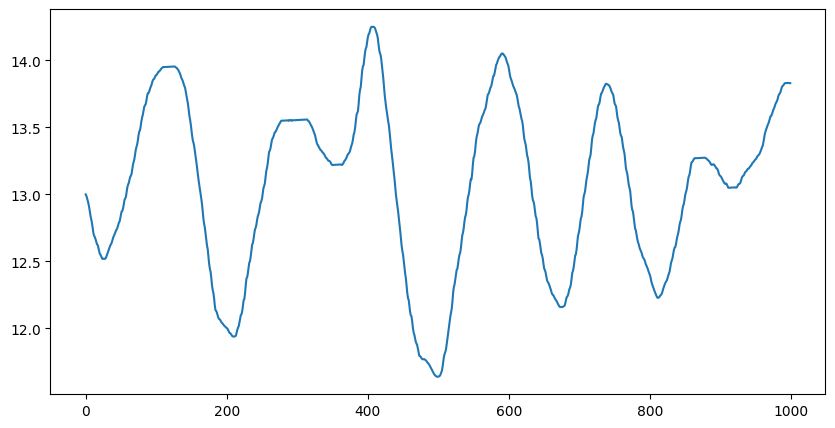

In [32]:
plt.plot(modified_lst)


In [7]:
# Save to a npy file
np.save('./functions/holdArrays/FISP_TR_Jiang.npy', modified_lst)

Text(0, 0.5, 'TR (ms)')

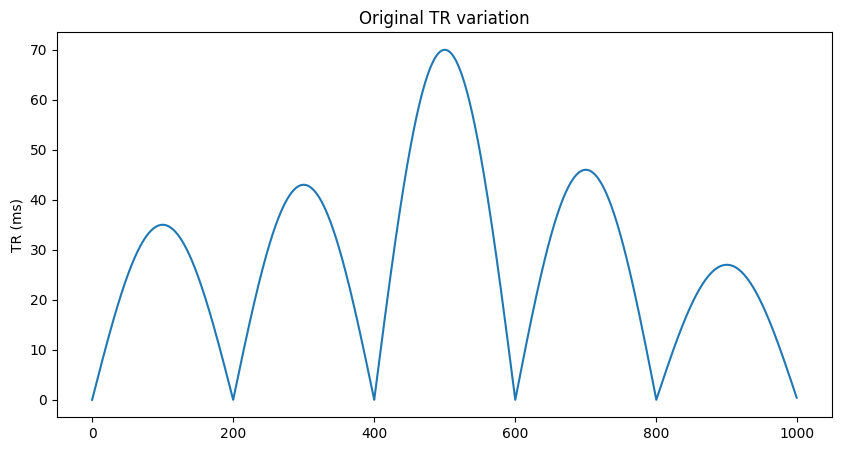

In [20]:
# Show original TR array from Emma's paper
trArrayOrig = np.load('./functions/holdArrays/faArray_3.npy')
plt.plot(trArrayOrig)
plt.title('Original TR variation')
plt.ylabel('TR (ms)')


In [22]:
Counter(trArrayOrig)

Counter({0.0: 5,
         21.451746877854177: 2,
         23.555437972842064: 2,
         25.13442042171161: 2,
         26.967963497152624: 2,
         27.315064256841538: 2,
         28.63524010987582: 2,
         28.94782009960966: 2,
         30.12597094513803: 2,
         30.931797053104273: 2,
         31.185228346592876: 2,
         31.430965151621546: 2,
         32.12141189893934: 2,
         32.5421770060888: 2,
         32.74054107904536: 2,
         32.930826913397894: 2,
         33.112987558964086: 2,
         33.610278998693005: 2,
         33.759509646022934: 2,
         33.900410639502084: 2,
         34.03294721391868: 2,
         34.2727983717618: 2,
         34.3800537755041: 2,
         34.47882641541709: 2,
         34.56909192082982: 2,
         34.650828020079516: 2,
         34.78863344093129: 2,
         34.8446687611078: 2,
         34.89210668065948: 2,
         34.930935494989505: 2,
         34.96114562366895: 2,
         34.982729612800604: 2,
         34

In [8]:
a = 13
b = 40
noOfRepetitions = 1000
xRange = np.array(range(noOfRepetitions))
Range = np.array(range(noOfRepetitions))
        #Calculate the sinusoidal array 
        #Sometimes a random variation is added to the flip angle to reduced 
        #effects of matching errors with inhomogeneous B1 fields 
        #Hence there is a random element that can be added (set currently to 0)
faArray = np.squeeze(a*(np.abs(3*np.sin(xRange/b)+(np.sin(xRange/b)**2))) \
            +  np.random.uniform(0,0,[1,noOfRepetitions]))


Text(0, 0.5, 'Flip Angle (degrees)')

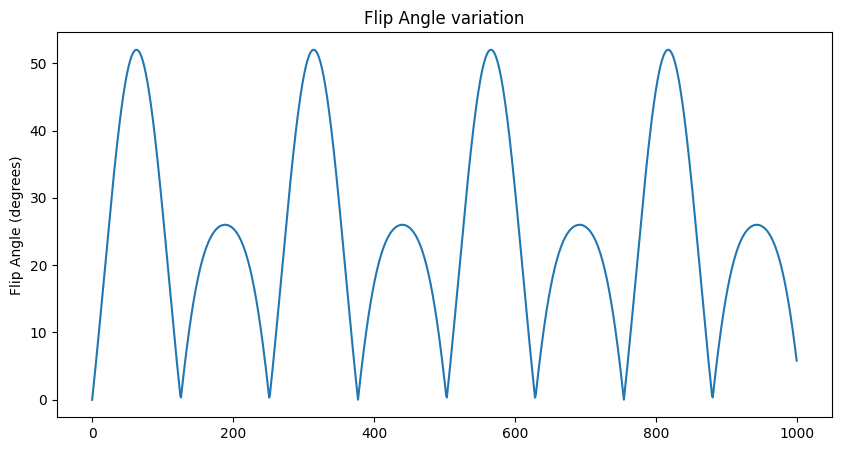

In [9]:
plt.plot(faArray)
plt.title('Flip Angle variation')
plt.ylabel('Flip Angle (degrees)')

In [10]:
import random
Nrf = 200
cycles = noOfRepetitions/Nrf
faArray = []
#maxFA = random.sample(range(5,90),int(cycles)) # random sample of flip angles
maxFA = [35,43,70,46,27]
for i in range(int(cycles)):
    # Current random flip angle
    maxFA_i = maxFA[i]
    
    # Iterate through the segment
    for j in range(Nrf):
        # Calculate the flip angle
        flipAngle = np.sin(j*np.pi/Nrf)*maxFA_i
        # Append the flip angle to the array
        faArray.append(flipAngle)

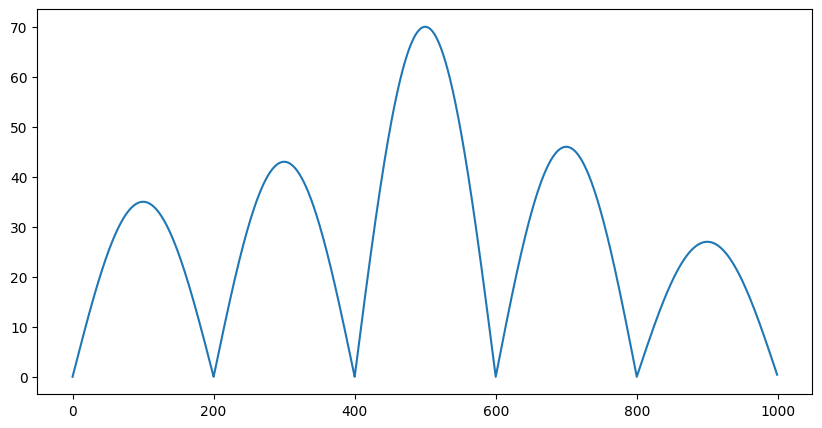

In [11]:
plt.plot(faArray)

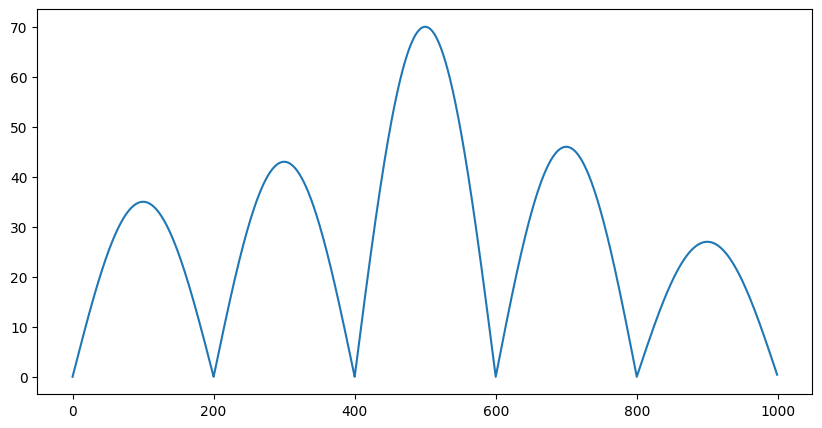

In [12]:
Nrf = 200
cycles = noOfRepetitions/Nrf
faArray = []
#maxFA = random.sample(range(5,90),int(cycles)) # random sample of flip angles
maxFA = [35,43,70,46,27] # values from the paper
for i in range(int(cycles)):
    # Current random flip angle
    maxFA_i = maxFA[i]
    # Iterate through the segment
    for j in range(Nrf):
        # Calculate the flip angle
        flipAngle = np.sin(j*np.pi/Nrf)*maxFA_i
        # Append the flip angle to the array
        faArray.append(flipAngle)
plt.plot(faArray)